In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Dataset.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df=data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
nunique_values = df.nunique()
print("\nNumber of unique values for each column:")
print(nunique_values)


Number of unique values for each column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6526
Churn                  2
dtype: int64


In [10]:
#customer id contains unique values only.Hence can drop the column
df1=df.drop('customerID',axis=1)

Dropped customer_id

In [11]:
unique_values = {col: df1[col].unique() for col in df1.columns}
print("Unique values for each column:\n")
for col, values in unique_values.items():
    print(f"{col}: {values}\n\n")

Unique values for each column:

gender: ['Female' 'Male']


SeniorCitizen: [ 0.  1. nan]


Partner: ['Yes' 'No']


Dependents: ['No' 'Yes']


tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. nan 72. 17. 71. 27.
  5. 46. 11. 70. 63. 52. 69. 43. 15. 25. 60. 18. 66. 47.  9.  3. 31. 50.
 64. 56. 30.  7. 42. 35. 48. 29. 65. 12. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 21. 26.
  0. 39.]


PhoneService: ['No' 'Yes' nan]


MultipleLines: ['No phone service' 'No' 'Yes' nan]


InternetService: ['DSL' 'Fiber optic' 'No' nan]


OnlineSecurity: ['No' 'Yes' 'No internet service' nan]


OnlineBackup: ['Yes' 'No' 'No internet service' nan]


DeviceProtection: ['No' 'Yes' 'No internet service' nan]


TechSupport: ['No' 'Yes' 'No internet service' nan]


StreamingTV: ['No' 'Yes' 'No internet service' nan]


StreamingMovies: ['No' 'Yes' 'No internet service' nan]


Contract: ['Month-to-month' 'One year' 'Two year' nan]


PaperlessBilling

In [12]:
value_counts = {col: df1[col].value_counts() for col in df1.columns}
print("\nValue counts for each column:")
for col, counts in value_counts.items():
    print(f"\n{col}:\n{counts}")


Value counts for each column:

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen:
SeniorCitizen
0.0    5896
1.0    1140
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure:
tenure
1.0     611
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
28.0     57
39.0     56
44.0     51
36.0     50
0.0      11
Name: count, Length: 73, dtype: int64

PhoneService:
PhoneService
Yes    6349
No      681
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3382
Yes                 2967
No phone service     681
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3081
DSL            2407
No             1518
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No                     3492
Yes                    2013
No internet service    1523
Name: count, dtype: int64

OnlineBackup:
Onl

In [13]:
df1['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
df1['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


The target column is not balanced.

**EDA**

In [15]:
df_test=df1.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Churn']=le.fit_transform(df_test['Churn'])
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


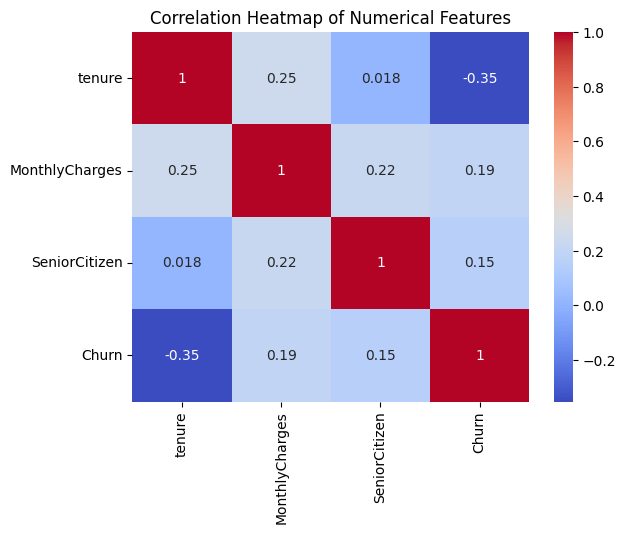

In [17]:
corr = df_test[['tenure', 'MonthlyCharges','SeniorCitizen','Churn']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


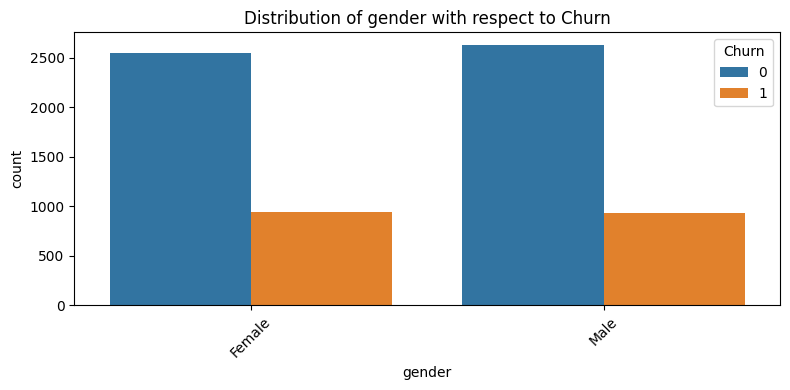

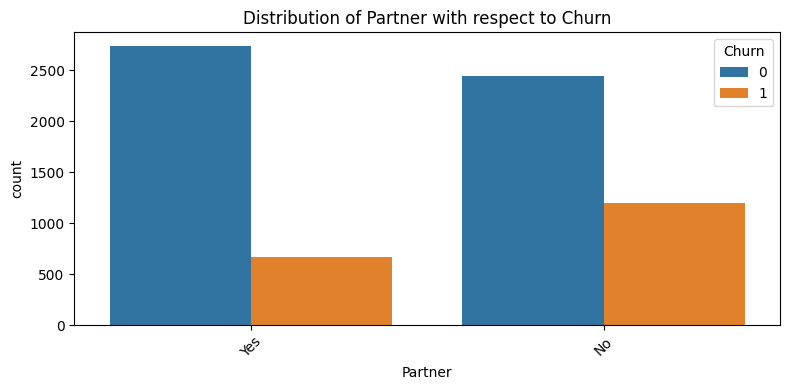

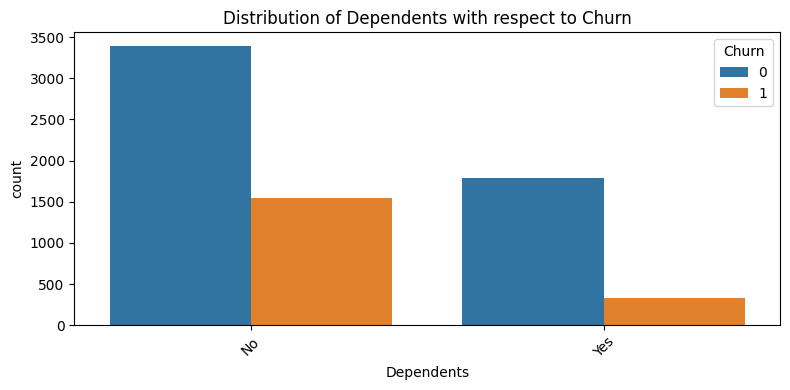

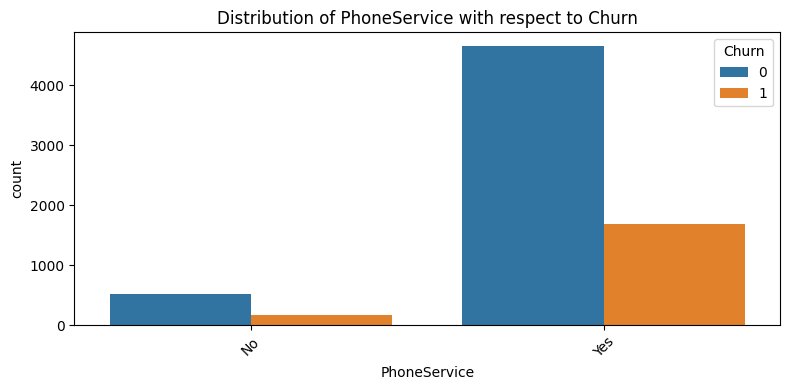

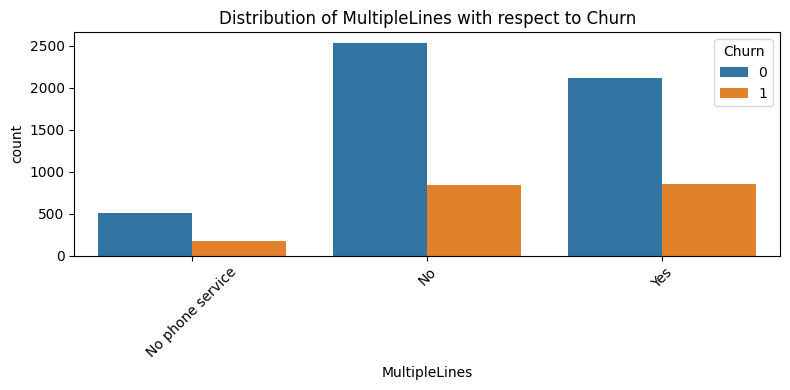

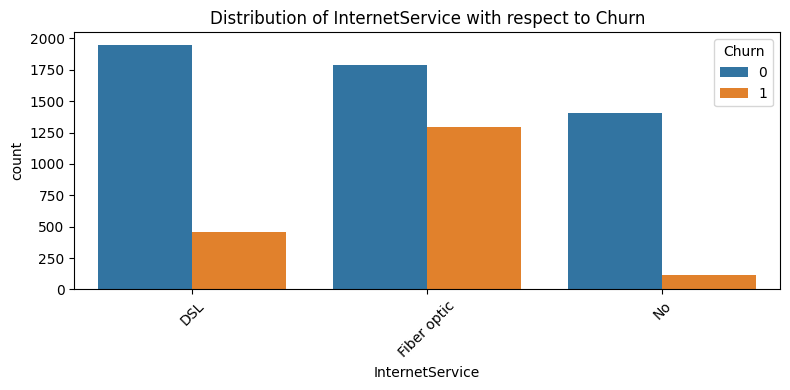

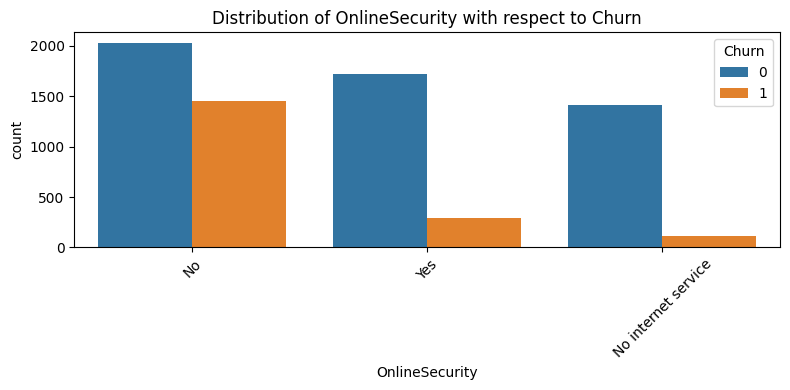

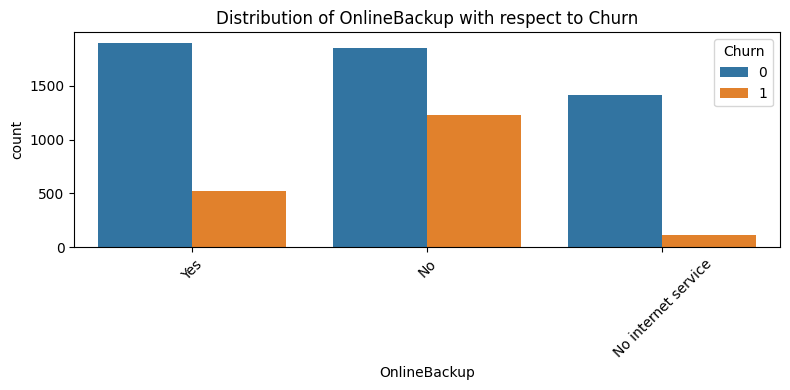

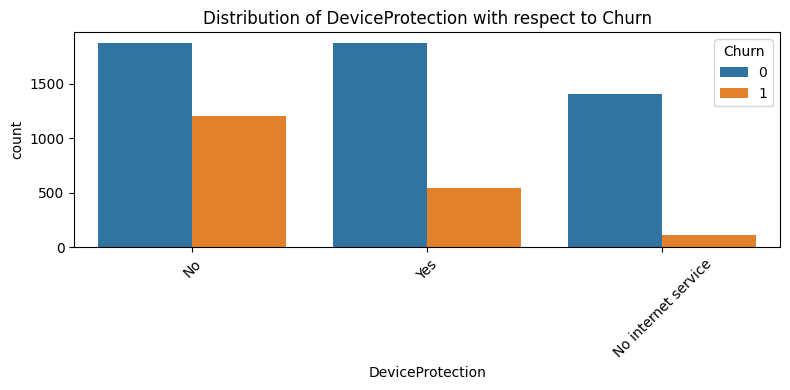

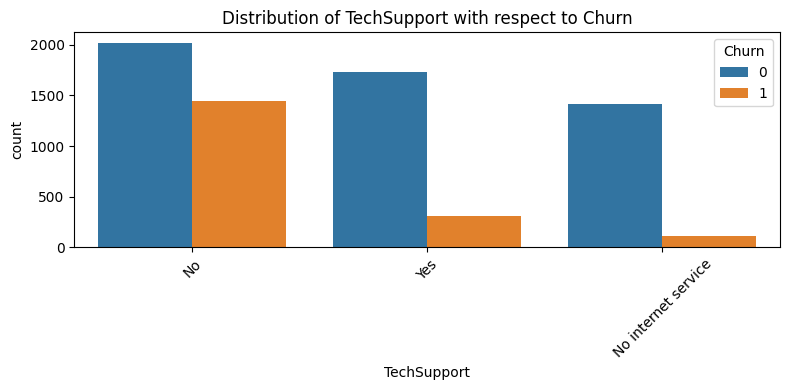

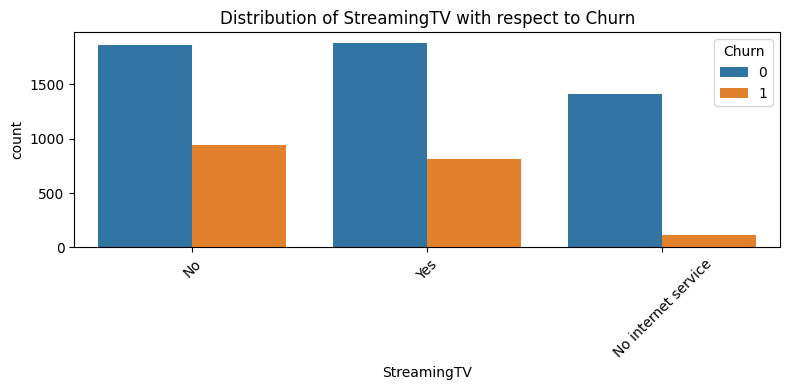

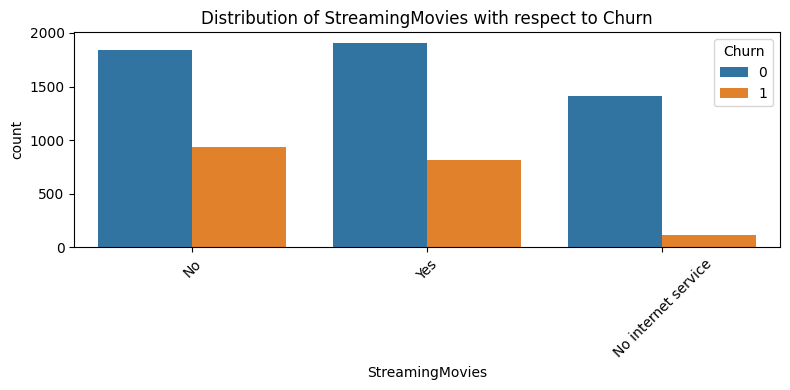

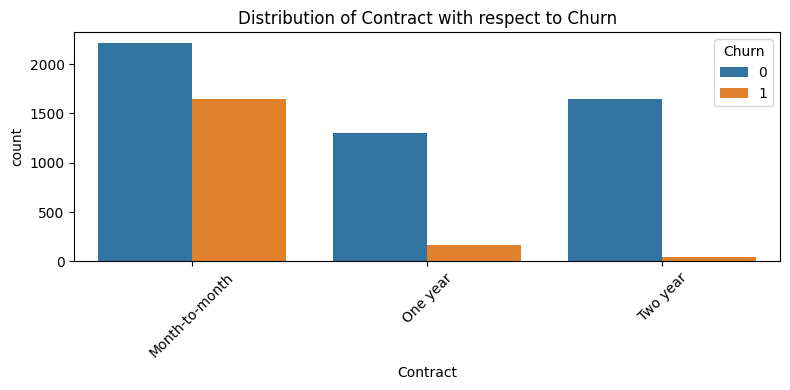

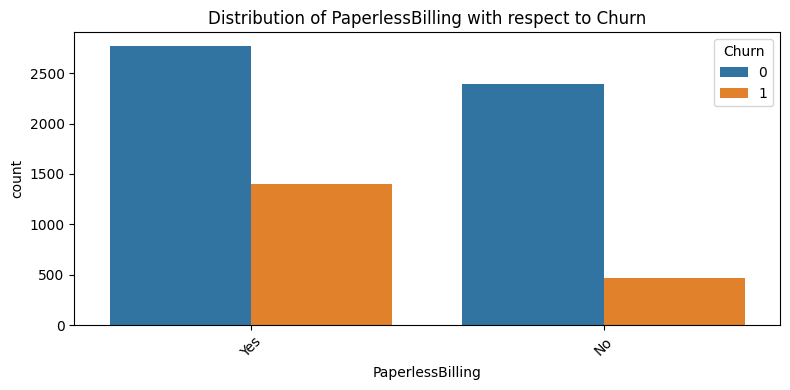

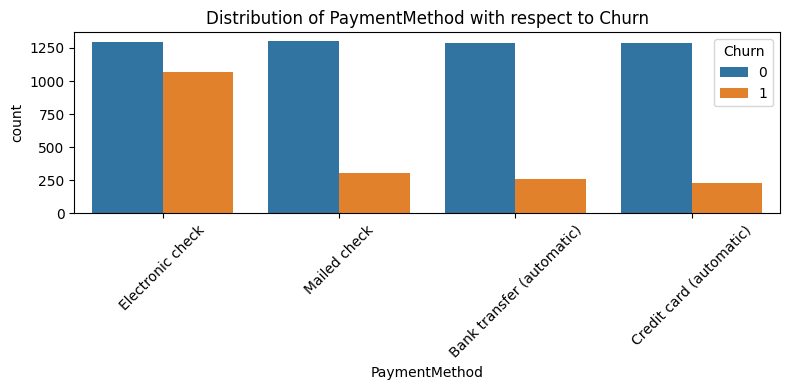

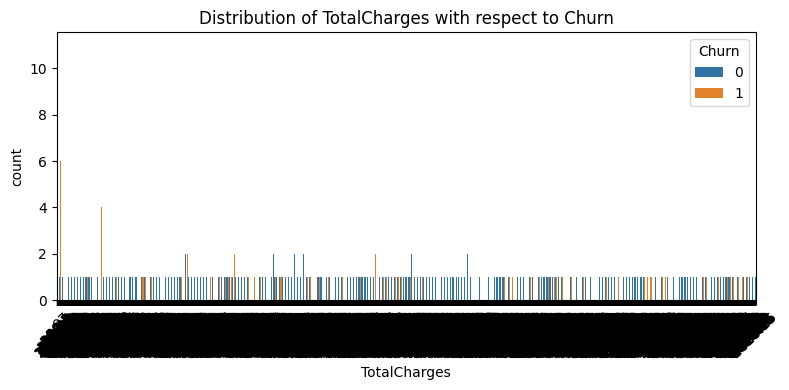

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = df_test.select_dtypes(include=['object', 'bool']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Churn', data=df_test)
    plt.title(f'Distribution of {col} with respect to Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Customers with no partner,no dependants are more likely churn yes.
Those use fibreoptic internet service ,no online security ,no online backup , no tech support are more likely churn yes.
customers with month-to-month contract,paperless billing and use electronic check are more likely churn yes.

**Handling missing values**

In [19]:
df1.isnull().sum()

,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15
OnlineBackup,15


In [20]:
df1.isnull().sum()/df1.shape[0]*100

,0
gender,0.000000
SeniorCitizen,0.099389
Partner,0.000000
Dependents,0.000000
tenure,0.184580
PhoneService,0.184580
MultipleLines,0.184580
InternetService,0.525344
OnlineSecurity,0.212977
OnlineBackup,0.212977


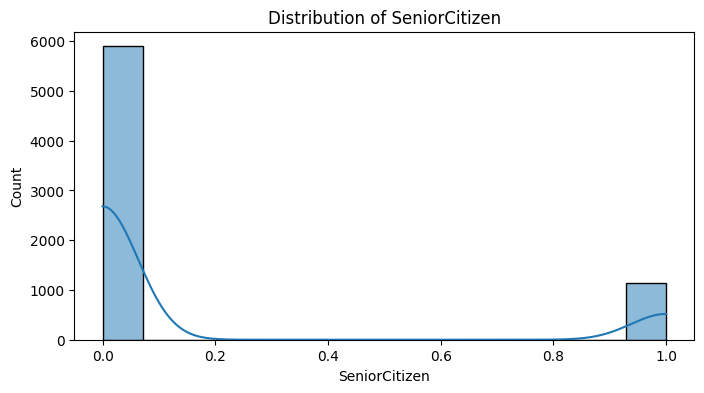

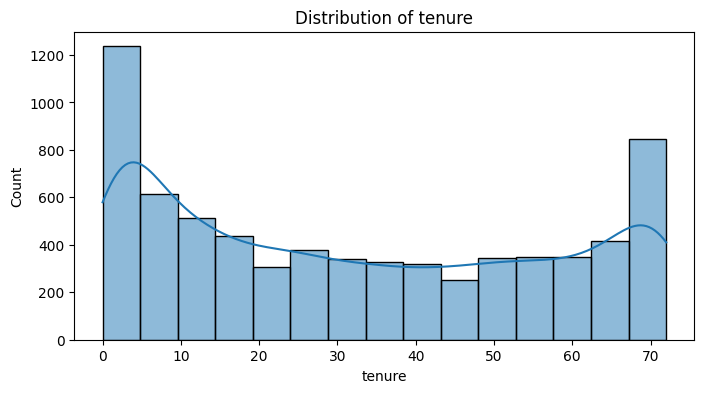

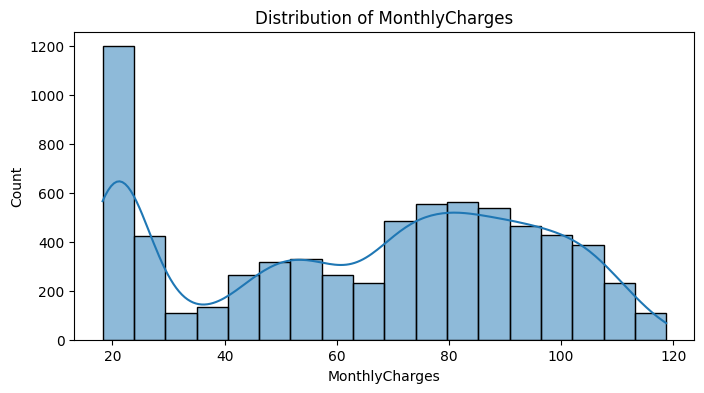

In [21]:
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[col], kde=True)  # kde=True to add a kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.show()

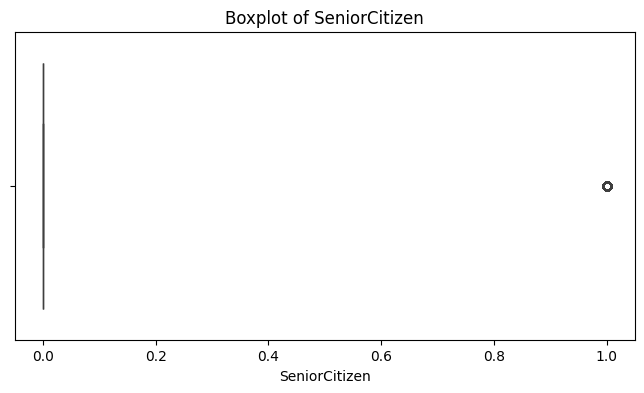

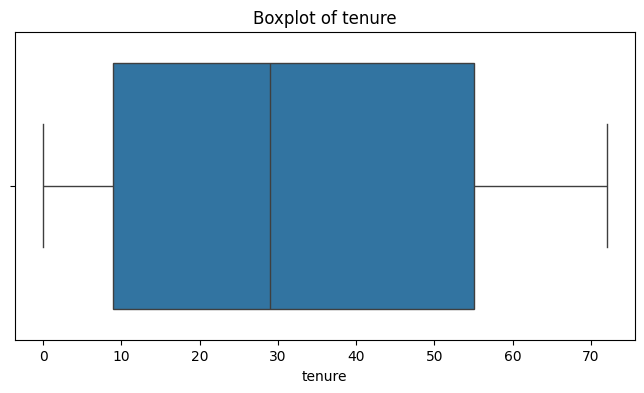

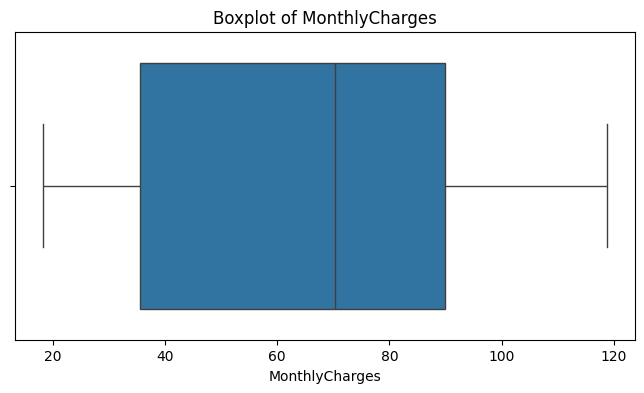

In [22]:

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Missing values in numerical columns can be filled with median and that of categorical values can be filled with mode.

In [23]:
df1['SeniorCitizen'].fillna(df1['SeniorCitizen'].median(), inplace=True)
df1['tenure'].fillna(df1['tenure'].median(), inplace=True)
df1['MonthlyCharges'].fillna(df1['MonthlyCharges'].median(), inplace=True)

In [24]:
# List of categorical columns to fill with mode (most frequent value)
categorical_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod','TotalCharges']

for col in categorical_columns:
    df1[col].fillna(df1[col].mode()[0], inplace=True)


In [25]:
df1.isnull().sum().sum()

0

No significant outliers are there.

**Encoding**

In [26]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

print(df1['TotalCharges'].isnull().sum())

df1['TotalCharges'].fillna(df1['TotalCharges'].median(), inplace=True)
print(df1['TotalCharges'].isnull().sum())

18
0


In [27]:
unique_values = {col: df1[col].unique() for col in df1.columns}
print("Unique values for each column:\n")
for col, values in unique_values.items():
    print(f"{col}: {values}\n\n")

Unique values for each column:

gender: ['Female' 'Male']


SeniorCitizen: [0. 1.]


Partner: ['Yes' 'No']


Dependents: ['No' 'Yes']


tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 29. 72. 17. 71. 27.
  5. 46. 11. 70. 63. 52. 69. 43. 15. 25. 60. 18. 66. 47.  9.  3. 31. 50.
 64. 56. 30.  7. 42. 35. 48. 65. 12. 38. 68. 32. 55. 37. 36. 41.  6.  4.
 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 21. 26.  0.
 39.]


PhoneService: ['No' 'Yes']


MultipleLines: ['No phone service' 'No' 'Yes']


InternetService: ['DSL' 'Fiber optic' 'No']


OnlineSecurity: ['No' 'Yes' 'No internet service']


OnlineBackup: ['Yes' 'No' 'No internet service']


DeviceProtection: ['No' 'Yes' 'No internet service']


TechSupport: ['No' 'Yes' 'No internet service']


StreamingTV: ['No' 'Yes' 'No internet service']


StreamingMovies: ['No' 'Yes' 'No internet service']


Contract: ['Month-to-month' 'One year' 'Two year']


PaperlessBilling: ['Yes' 'No']


PaymentMethod: ['Electronic check

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [63]:
encoded_df = pd.get_dummies(df1, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'],drop_first=True)
encoded_cols1 = encoded_df.select_dtypes(include=[ 'bool']).columns
encoded_df[encoded_cols1] = encoded_df[encoded_cols1].astype(int)
print(encoded_df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            0.0     Yes         No     1.0           No   
1    Male            0.0      No         No    34.0          Yes   
2    Male            0.0      No         No     2.0          Yes   
3    Male            0.0      No         No    45.0           No   
4  Female            0.0      No         No     2.0          Yes   

  PaperlessBilling  MonthlyCharges  TotalCharges Churn  \
0              Yes           29.85         29.85    No   
1               No           56.95       1889.50    No   
2              Yes           53.85        108.15   Yes   
3               No           42.30       1840.75    No   
4              Yes           70.70        151.65   Yes   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                 

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_label_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn'
]
for col in columns_to_label_encode:
    encoded_df[col] = le.fit_transform(encoded_df[col])
print(encoded_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0            0.0        1           0     1.0             0   
1       1            0.0        0           0    34.0             1   
2       1            0.0        0           0     2.0             1   
3       1            0.0        0           0    45.0             0   
4       0            0.0        0           0     2.0             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0                 1           29.85         29.85      0   
1                 0           56.95       1889.50      0   
2                 1           53.85        108.15      1   
3                 0           42.30       1840.75      0   
4                 1           70.70        151.65      1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0           

In [65]:
x = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']
x.head()
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [45]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)

# X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

**Handling imbalance**

In [67]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)


In [68]:
from collections import Counter

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_resampled))

Original dataset shape: Counter({0: 4139, 1: 1495})
Resampled dataset shape: Counter({0: 3792, 1: 3792})


**Scaling**

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
x_test = scaler.transform(x_test)

**Model**

In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Define the XGBoost model
xgb_model = XGBClassifier(max_depth=50, random_state=42, n_estimators=50)

# Fit the model
xgb_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_xgb = xgb_model.predict(x_test)

# Train accuracy and evaluation metrics (optional, you can uncomment to check)
print("Train Accuracy\n\n")
y_pred_train_xgb = xgb_model.predict(X_resampled)
print("Confusion Matrix:\n", confusion_matrix(y_resampled, y_pred_train_xgb))
print("\nClassification Report:\n", classification_report(y_resampled, y_pred_train_xgb))
print("Accuracy:", accuracy_score(y_resampled, y_pred_train_xgb))
print("Precision:", precision_score(y_resampled, y_pred_train_xgb))
print("Recall:", recall_score(y_resampled, y_pred_train_xgb))

# Test accuracy and evaluation metrics
print("\n\nTest Accuracy\n\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nF1 Score:", f1_score(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))


Train Accuracy


Confusion Matrix:
 [[3778   14]
 [   7 3785]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3792
           1       1.00      1.00      1.00      3792

    accuracy                           1.00      7584
   macro avg       1.00      1.00      1.00      7584
weighted avg       1.00      1.00      1.00      7584

Accuracy: 0.9972310126582279
Precision: 0.996314819689392
Recall: 0.9981540084388185


Test Accuracy


Confusion Matrix:
 [[875 160]
 [154 220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.59      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409


F1 Score: 0.583554376657825
Accuracy: 0.7771469127040455
Precision: 0.5789473684210527


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

rf_model = RandomForestClassifier(max_depth=50, random_state=42, n_estimators=50,)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(x_test)

# print("Train Accuracy\n\n")
# y_pred_train_rf=rf_model.predict(X_resampled)
# print("Confusion Matrix:\n", confusion_matrix(y_resampled, y_pred_train_rf))
# print("\nClassification Report:\n", classification_report(y_resampled, y_pred_train_rf))
# print("Accuracy:", accuracy_score(y_resampled, y_pred_train_rf))
# print("Precision:", precision_score(y_resampled, y_pred_train_rf))
# print("Recall:", recall_score(y_resampled, y_pred_train_rf))

print("\n\nTest Accuracy\n\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nF1 Score:", f1_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))



Test Accuracy


Confusion Matrix:
 [[870 165]
 [148 226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409


F1 Score: 0.5908496732026144
Accuracy: 0.7778566359119943
Precision: 0.578005115089514
Recall: 0.6042780748663101


In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(x_test)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,n_estimators =50,max_depth=30,min_samples_split=10)

rf_model.fit(X_train_pca, y_resampled)

# Make predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.55      0.59      0.57       374

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.76      0.77      1409

Accuracy Score: 0.7636621717530163
Precision Score: 0.5508684863523573
Recall Score: 0.5935828877005348


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(x_test)

# Evaluate the best model
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nF1 Score:", f1_score(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Precision Score:", precision_score(y_test, y_pred_rf))
print("Recall Score:", recall_score(y_test, y_pred_rf))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred_dt=model.predict(x_test)

print("Train Accuracy\n")
y_pred_train=model.predict(X_resampled)
print("Confusion Matrix:\n", confusion_matrix(y_resampled, y_pred_train))
print("\nClassification Report:\n", classification_report(y_resampled, y_pred_train))
print("Accuracy:", accuracy_score(y_resampled, y_pred_train))

print("\n\n\nTest Accuracy")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nF1 Score:", f1_score(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

Train Accuracy

Confusion Matrix:
 [[3361  447]
 [ 217 3591]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      3808
           1       0.89      0.94      0.92      3808

    accuracy                           0.91      7616
   macro avg       0.91      0.91      0.91      7616
weighted avg       0.91      0.91      0.91      7616

Accuracy: 0.9128151260504201



Test Accuracy
Confusion Matrix:
 [[708 327]
 [141 233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75      1035
           1       0.42      0.62      0.50       374

    accuracy                           0.67      1409
   macro avg       0.62      0.65      0.63      1409
weighted avg       0.72      0.67      0.68      1409


F1 Score: 0.4989293361884369
Accuracy: 0.6678495386799148
Precision: 0.4160714285714286
Recall: 0.6229946524064172
